In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import matplotlib

In [6]:
covid_df= pd.read_csv("https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv")

2. High Level Data Understanding: a. Find no. of rows & columns in the dataset b. Data types of columns. c. Info & describe of data in dataframe

In [7]:
print("Number of rows : ", covid_df.shape[0])
print("Number of columns : ", covid_df.shape[1])


Number of rows :  57394
Number of columns :  49


In [8]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)

In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [10]:
covid_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,...,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,...,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,...,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,...,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,...,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,...,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,...,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,...,78.100000,98.999000,13.800000,86.750000,0.953000


3. Low Level Data Understanding : a. Find count of unique values in location column. b. Find which continent has maximum frequency using values counts. c. Find maximum & mean value in 'total_cases'. d. Find 25%,50% & 75% quartile value in 'total_deaths'. e. Find which continent has maximum 'human_development_index'. f. Find which continent has minimum 'gdp_per_capita'.

In [11]:
# a. Find count of unique values in location column.
covid_df['location'].value_counts()

Afghanistan          323
Iran                 323
Macedonia            323
Luxembourg           323
Lithuania            323
                    ... 
Hong Kong             72
Solomon Islands       33
Wallis and Futuna     32
Marshall Islands      20
Vanuatu                7
Name: location, Length: 216, dtype: int64

In [12]:
# b. Find which continent has maximum frequency using values counts.
covid_df['continent'].value_counts().idxmax()

'Europe'

In [13]:
# c. Find maximum & mean value in 'total_cases'
print("maximum value of total_cases:", covid_df['total_cases'].max())
print("mean value of total_cases:",covid_df['total_cases'].mean().round())

maximum value of total_cases: 55154651.0
mean value of total_cases: 167797.0


In [14]:
# d. Find 25%,50% & 75% quartile value in 'total_deaths'.
print(covid_df['total_deaths'].quantile(0.25))
print(covid_df['total_deaths'].quantile(0.5))
print(covid_df['total_deaths'].quantile(0.75))

13.0
84.0
727.0


In [15]:
# e. Find which continent has maximum 'human_development_index'.
covid_df_hdi=pd.DataFrame(covid_df.groupby('continent')['human_development_index'].max())
covid_df_hdi.sort_values(by=['human_development_index'],ascending=False).head(1).index[0]

'Europe'

In [16]:
# f. Find which continent has minimum 'gdp_per_capita'.
covid_df_gdp=pd.DataFrame(covid_df.groupby('continent')['gdp_per_capita'].min())
covid_df_gdp.sort_values(by=['gdp_per_capita'],ascending=True).head(1).index[0]

'Africa'

4. Filter the dataframe with only this columns
['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame

In [17]:
covid_df=covid_df.filter(['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'])

In [18]:
covid_df.columns

Index(['continent', 'location', 'date', 'total_cases', 'total_deaths',
       'gdp_per_capita', 'human_development_index'],
      dtype='object')

5. Data Cleaning
 a. Remove all duplicates observations
 b. Find missing values in all columns
 c. Remove all observations where continent column value is 
missing
 Tip : using subset parameter in dropna
 d. Fill all missing values with 0

In [19]:
# a. Remove all duplicates observations
covid_df.duplicated().sum()

0

In [20]:
# b. Find missing values in all columns
covid_df.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [21]:
# c. Remove all observations where continent column value is missing Tip : using subset parameter in dropna
covid_df['continent'].isnull().sum()

646

In [22]:
covid_df.dropna(subset=['continent'],inplace=True)

In [23]:
covid_df['continent'].isnull().sum()

0

In [24]:
covid_df.shape

(56748, 7)

In [25]:
# d. Fill all missing values with 0
covid_df['total_cases'] = covid_df['total_cases'].fillna(0)

In [26]:
covid_df['total_deaths'] = covid_df['total_deaths'].fillna(0)

In [27]:
covid_df['gdp_per_capita'] = covid_df['gdp_per_capita'].fillna(0)

In [28]:
covid_df['human_development_index'] = covid_df['human_development_index'].fillna(0)

6. Date time format :
 a. Convert date column in datetime format using 
pandas.to_datetime
 b. Create new column month after extracting month data from 
date
 column.

In [29]:
covid_df.head(5)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498


In [30]:
#  a. Convert date column in datetime format using pandas.to_datetime
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [31]:
covid_df.head(5)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498


In [32]:
#  b. Create new column month after extracting month data from date column.
covid_df['month']=covid_df['date'].dt.month

In [33]:
covid_df.head(10)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
5,Asia,Afghanistan,2020-05-01,0.0,0.0,1803.987,0.498,5
6,Asia,Afghanistan,2020-06-01,0.0,0.0,1803.987,0.498,6
7,Asia,Afghanistan,2020-07-01,0.0,0.0,1803.987,0.498,7
8,Asia,Afghanistan,2020-08-01,0.0,0.0,1803.987,0.498,8
9,Asia,Afghanistan,2020-09-01,0.0,0.0,1803.987,0.498,9


7. Data Aggregation:
 a. Find max value in all columns using groupby function on 
'continent'
 column
 Tip: use reset_index() after applying groupby
 b. Store the result in a new dataframe named 'df_groupby'.
 (Use df_groupby dataframe for all further analysis)

In [34]:
# a. Find max value in all columns using groupby function on 'continent' column Tip: use reset_index() after applying group by
covid_df.groupby('continent').max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [35]:
# b. Store the result in a new dataframe named 'df_groupby'. (Use df_groupby dataframe for all further analysis)
df_groupby=covid_df.groupby('continent').max().reset_index()

In [36]:
df_groupby.head(10)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


8. Feature Engineering : a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

In [37]:
# a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby['total_deaths_to_total_cases']=df_groupby['total_deaths']/df_groupby['total_cases']

In [38]:
df_groupby.head(10)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


Data Visualization :
 a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
 b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
 c. Plot Pairplot on df_groupby dataset.
 d. Plot a bar plot of 'continent' column with 'total_cases' . Tip : using kind='bar' in seaborn catplot

C:\Users\NAMIT\AppData\Local\Temp\ipykernel_928\1342357786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_groupby['gdp_per_capita'])


<AxesSubplot: xlabel='gdp_per_capita', ylabel='Density'>

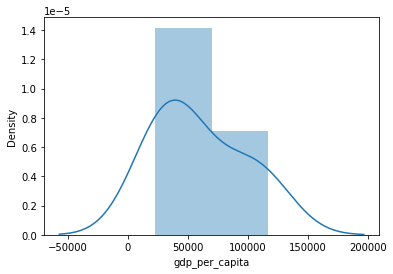

In [39]:
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
sns.distplot(df_groupby['gdp_per_capita'])

<AxesSubplot: xlabel='total_cases', ylabel='gdp_per_capita'>

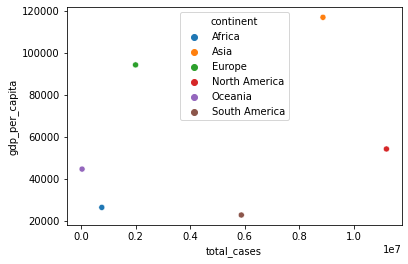

In [40]:
# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(data=df_groupby, x='total_cases', y='gdp_per_capita',hue='continent')

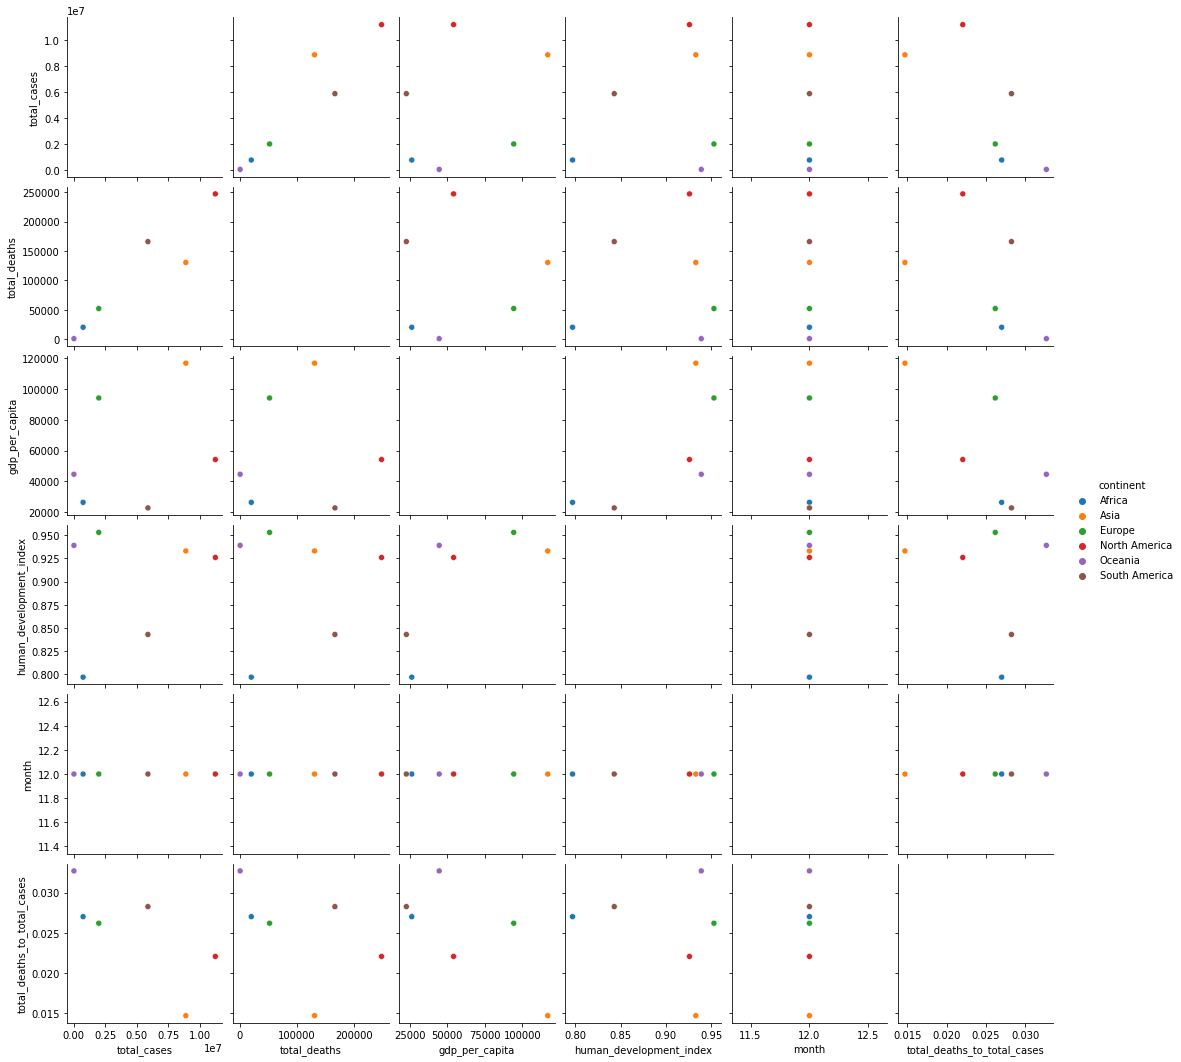

In [41]:
# c. Plot Pairplot on df_groupby dataset.
sns.pairplot(data=df_groupby,hue='continent')

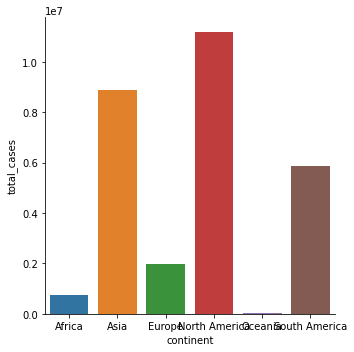

In [42]:
# d. Plot a bar plot of 'continent' column with 'total_cases' . Tip : using kind='bar' in seaborn catplot
sns.catplot(data=df_groupby,x='continent',y='total_cases',kind='bar')

10.Save the df_groupby dataframe in your local drive using pandas.to_csv function 

In [43]:
df_groupby.to_csv('covid_groupby.csv', index = False)